In [280]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random
import os

data = pd.read_csv("Life Expectancy Data.csv")


data.dropna(subset = ['Life expectancy '], inplace = True)

data.shape

(2928, 22)

In [281]:
GDP_data = pd.read_csv("GDP.csv", header = 4)

#GDP_data.head()

In [282]:
country_labels = pd.read_csv("CountryNames.csv")

#country_labels.head(30)

In [283]:
i = 0
for index, row in GDP_data.iterrows():
    try:
        mask = row['Country Name'] == country_labels['Country']    
        x = country_labels[mask]['Target Name'].values[0]
        GDP_data.at[index, 'Country Name'] = x
    
    except:    
        continue

#GDP_data.tail()

In [286]:

for index, row in data.iterrows():
    try:
        mask = GDP_data['Country Name'] == row['Country']     
        x = GDP_data[mask][str(row['Year'])].values[0]
        data.at[index, 'New GDP'] = x
    
    except:
    
        continue


data['New GDP'].isna().value_counts(normalize=True)
#data[data['New GDP']. isna()][['Country', 'Year']]
#data.head(20)

#data['New GDP'].value_counts

False    0.956626
True     0.043374
Name: New GDP, dtype: float64

In [287]:
#data['GDP'].isna().value_counts(normalize=True)

# Average Life Expectancy per Year

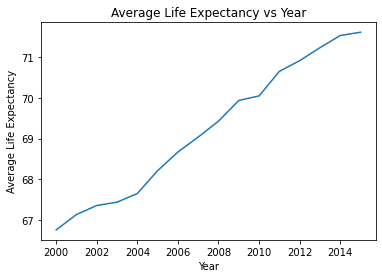

In [288]:
overall_average = data.groupby(['Year'])
overall_average = overall_average.aggregate({'Life expectancy ' : 'mean'})

#overall_average.head(16)
plt.plot(overall_average.index, overall_average['Life expectancy '])

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Year')
plt.savefig('Average Life Expectancy vs Year 1.jpg')
plt.show()



# Average Life Expectancy per Country

In [289]:
mask1 = data['Country'] == 'United States of America'
mask2 = data['Country'] == 'Saudi Arabia'
mask3 = data['Country'] == 'China'
mask4 = data['Country'] == 'India'
USA_average = data[mask1]
Saudi_average = data[mask2]
China_average = data[mask3]
India_average = data[mask4]

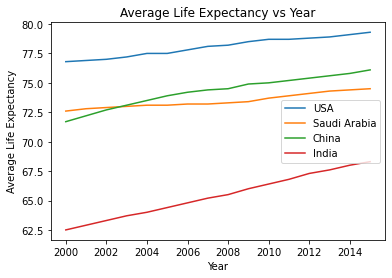

In [290]:
plt.plot(USA_average['Year'], USA_average['Life expectancy '], label = "USA")
plt.plot(Saudi_average['Year'], Saudi_average['Life expectancy '], label = "Saudi Arabia")
plt.plot(China_average['Year'], China_average['Life expectancy '], label = "China")
plt.plot(India_average['Year'], India_average['Life expectancy '], label = "India")
plt.legend()

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Year')
plt.savefig('Average Life Expectancy vs Year 2.jpg')

plt.show()

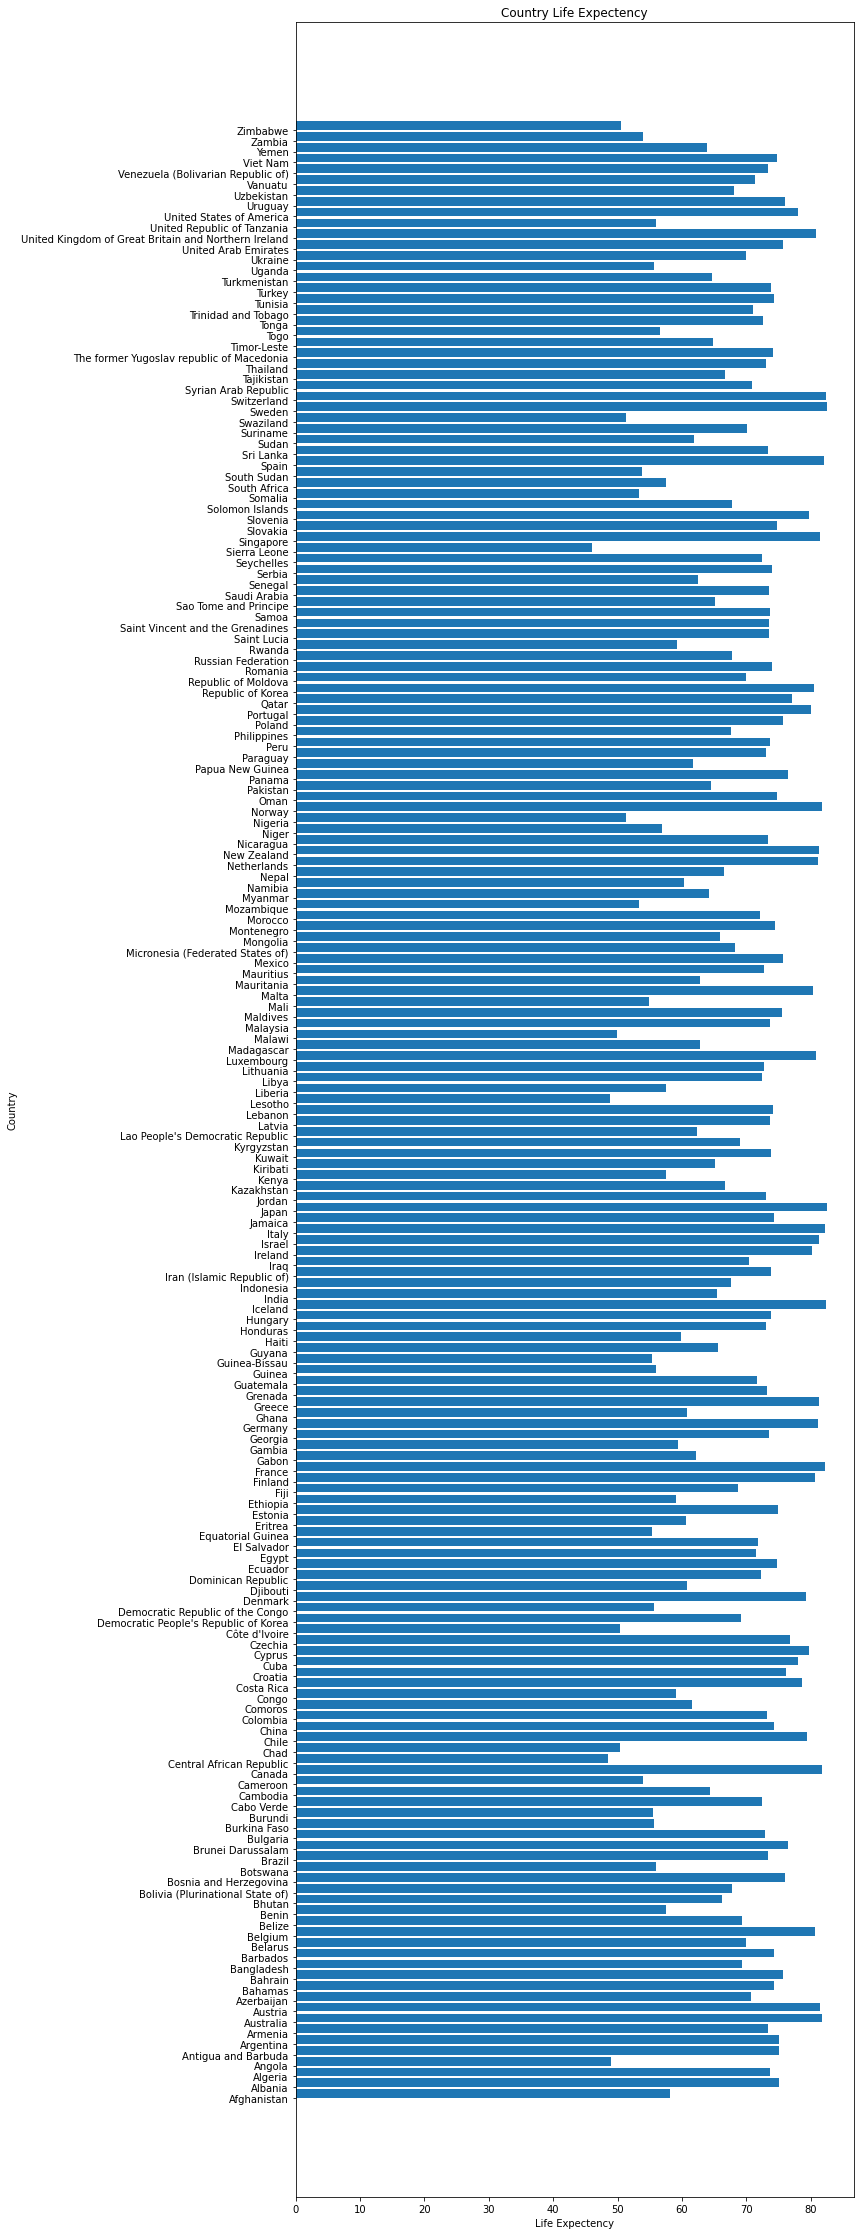

In [291]:
country_average = data.groupby(['Country'])
country_average = country_average.aggregate({'Life expectancy ' : 'mean'})
country_average.head()

#colors=np.random.rand(183)

plt.figure(figsize=(10,40))
plt.barh(country_average.index, country_average['Life expectancy '], align='edge')

plt.title('Country Life Expectency')
plt.xlabel('Life Expectency')
plt.ylabel('Country')
plt.savefig('CountrysAverage.jpg')
plt.show()

# Country Status vs Life Expectancy Plot

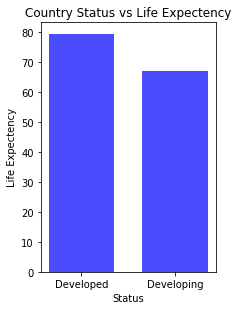

In [336]:
#data['Status'].isnull().value_counts(normalize = True)
aggre_data = data.groupby('Status')['Life expectancy '].sum()/data.groupby('Status')['Life expectancy '].count()
aggre_data = pd.DataFrame(aggre_data)

bar_width = 0.7
opacity = 0.7
plt.figure(figsize=(3,4))

plt.bar(aggre_data.index, aggre_data['Life expectancy '], bar_width,alpha=opacity,color='b')
plt.tight_layout()
plt.title('Country Status vs Life Expectency')
plt.xlabel('Status')
plt.ylabel('Life Expectency')
plt.savefig('Country Status vs Life Expectency.jpg')
plt.show()

# GDP vs Life Expectancy Plot

In [292]:
GDP_clean_set = data[data['New GDP'].notnull()]

GDP_clean_set.shape

(2801, 23)

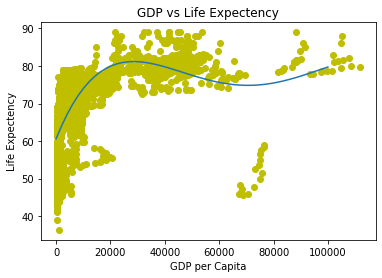

In [293]:
#colors=np.random.rand(2833)

plt.scatter(GDP_clean_set['New GDP'],GDP_clean_set['Life expectancy '], color = 'y')

model = np.poly1d(np.polyfit(GDP_clean_set['New GDP'], GDP_clean_set['Life expectancy '], 4))
#print(model)
polyline = np.linspace(0,100000)
plt.plot(polyline, model(polyline))

plt.title('GDP vs Life Expectency')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectency')
plt.savefig('GDP.jpg')
plt.show()